In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
df = pd.read_csv('Chapter_1_cleaned_data.csv')

O foco do projeto é achar contas em inadimplencia, sendo os valores 1 ou 0 desta coluna, no total 22% das contas ficaram inadimplentes

In [3]:
df['default payment next month'].mean()

np.float64(0.2217971797179718)

Amostras de cada classe

In [4]:
df.groupby('default payment next month')['ID'].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

Divisão de treinamento e teste para o modelo

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    df['EDUCATION'].values.reshape(-1,1),
    df['default payment next month'].values,
    test_size=0.2,
    random_state=24
)

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


In [7]:
np.mean(y_test)

np.float64(0.21657603600225014)

In [8]:
np.mean(y_train)

np.float64(0.223102526838873)

In [9]:
example_lr = LogisticRegression(
    C=0.1,
    class_weight=None,
    dual=False,
    fit_intercept=True,
    intercept_scaling=1,
    max_iter=100,
    multi_class='auto',
    n_jobs=None,
    penalty='l2',
    random_state=None,
    solver='liblinear',
    tol=0.0001,
    verbose=0,
    warm_start=False
)

In [10]:
example_lr.fit(X_train, y_train)

c:\Users\pedro\OneDrive\Ambiente de Trabalho\Livro\teste\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=0.1, multi_class='auto', solver='liblinear')

In [32]:
y_pred = example_lr.predict(X_test)

Acurácia do modelo

In [12]:
metrics.accuracy_score(y_test, y_pred)

0.7834239639977498

In [13]:
metrics.confusion_matrix(y_test, y_pred)

array([[4178,    0],
       [1155,    0]])

Obtendo probabilidades para a classe positiva (1) para análise de desempenho, como ROC e AUC

In [14]:
y_pred_proba = example_lr.predict_proba(X_test)
y_pred_proba

array([[0.77423402, 0.22576598],
       [0.77423402, 0.22576598],
       [0.78792915, 0.21207085],
       ...,
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085]])

Segunda coluna de probabilidades previstas (positiva)

In [15]:
pos_proba = y_pred_proba[:,1]
pos_proba

array([0.22576598, 0.22576598, 0.21207085, ..., 0.21207085, 0.21207085,
       0.21207085])

In [16]:
pos_sample_pos_proba = pos_proba[y_test==1]
neg_sample_pos_proba = pos_proba[y_test==0]

Visualizando a distribuição das probabilidades preditas para as classes positiva e negativa

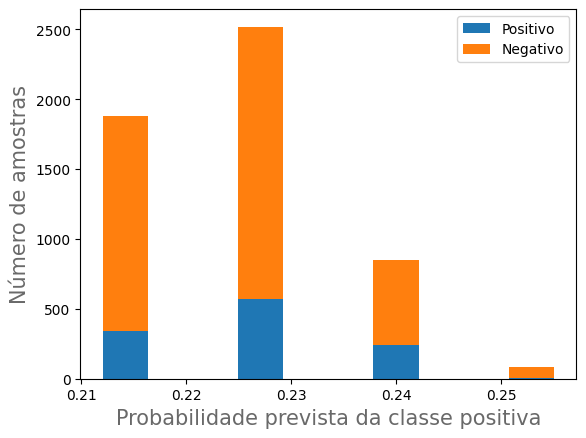

In [17]:
plt.hist([pos_sample_pos_proba, neg_sample_pos_proba], histtype='barstacked')
plt.legend(['Positivo', 'Negativo'])
plt.xlabel('Probabilidade prevista da classe positiva', fontsize=15, color='#696969')
plt.ylabel('Número de amostras', fontsize=15, color='#696969')
plt.show()

Calculando a curva ROC para medir o trade-off entre sensibilidade e especificidade

In [18]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)

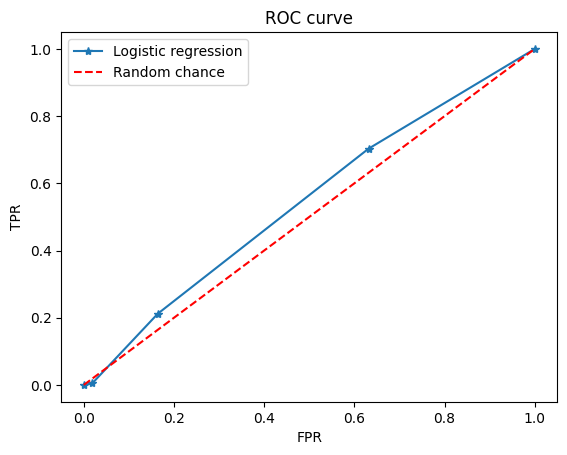

In [19]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

Limites da curva ROC

In [20]:
thresholds

array([       inf, 0.2549944 , 0.24007604, 0.22576598, 0.21207085])

ROC AUC para a avaliação da qualidade do classificador

In [21]:
metrics.roc_auc_score(y_test, pos_proba)

np.float64(0.5434650477972642)

Metricas para a avaliação da coluna LIMIT_BAL

In [22]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    df['LIMIT_BAL'].values.reshape(-1,1),
    df['default payment next month'].values,
    test_size=0.2,
    random_state=24
)

In [23]:
example_lr.fit(X_train2, y_train2)

c:\Users\pedro\OneDrive\Ambiente de Trabalho\Livro\teste\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=0.1, multi_class='auto', solver='liblinear')

In [24]:
y_pred_proba2 = example_lr.predict_proba(X_test2)
y_pred_proba2

array([[0.74826924, 0.25173076],
       [0.584297  , 0.415703  ],
       [0.79604453, 0.20395547],
       ...,
       [0.584297  , 0.415703  ],
       [0.82721498, 0.17278502],
       [0.66393434, 0.33606566]])

In [25]:
metrics.roc_auc_score(y_test2, y_pred_proba2[:,1])

np.float64(0.6201990844642832)

In [26]:
fpr_2, tpr_2, thresholds_2 = metrics.roc_curve(y_test2, y_pred_proba2[:,1])

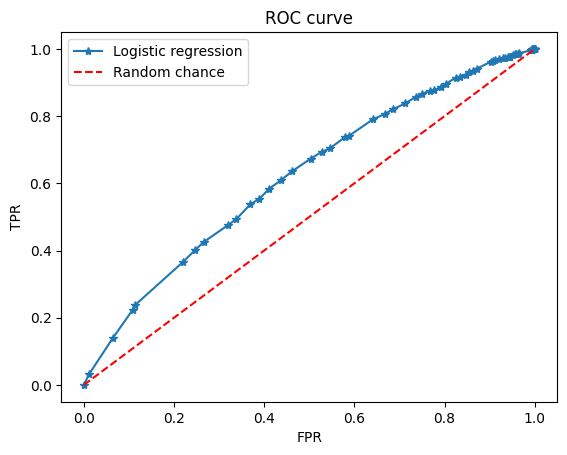

In [27]:
plt.plot(fpr_2, tpr_2, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [28]:
precision, recall, thresh_3 = metrics.precision_recall_curve(y_test2, y_pred_proba2[:,1])

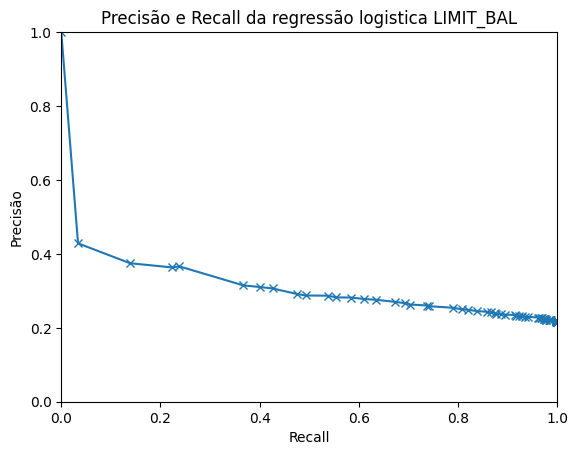

In [29]:
plt.plot(recall, precision, '-x')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title(f'Precisão e Recall da regressão logistica LIMIT_BAL')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

In [30]:
metrics.auc(recall, precision)

np.float64(0.31566964427378624)